# Air Quality Forecasting Using ML [FB Prophet]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
air_quality_data=pd.read_csv(r"C:\Users\matha\OneDrive\Desktop\AirQualityUCI.csv")
air_quality_data.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


**All the Values in the CSV file are separated by ;**

**Few Columns Have Comma In The Place Of Decimal Point**

In [ ]:
# Loading the CSV File and Printing the first 5 rows of the Data..
air_quality_data=pd.read_csv(r"C:\Users\matha\OneDrive\Desktop\AirQualityUCI.csv",sep=';',decimal=',')
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
# Drop Last 2 Columns From The Dataframe
air_quality_data=air_quality_data.iloc[:,:-2]
# Printing First 5 Rows
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
# Print Last 5 Rows
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Dataset Loaded Successfully!")
print("Shape Of The Data",air_quality_data.shape)

Dataset Loaded Successfully!
Shape Of The Data (9471, 15)


In [ ]:
air_quality_data.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
air_quality_data=air_quality_data.head(9357)
air_quality_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [ ]:
air_quality_data.shape

(9357, 15)

In [ ]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
# Counting The Number Of Times -200 Appears In The Data bcz Null Values Are Tagged With -200
air_quality_data.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

**Handling The Missing Values**

*Convert All -200 To NaN*

*Handling Missing Values With Mean Of The Column*

In [ ]:
air_quality_data=air_quality_data.replace(to_replace=-200,value=np.NaN)

In [ ]:
print("\nAfter replacing -200 with NaN :->")
print(air_quality_data.isnull().sum())


After replacing -200 with NaN :->
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [ ]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
air_quality_data.mean(numeric_only=True)

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [ ]:
# Replacing The Missing Values With Mean Values
air_quality_data=air_quality_data.fillna(air_quality_data.mean(numeric_only=True))
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**DATA VISUALIZATION SECTION**

In [ ]:
print("\n<--Descriptive Statistics-->")
print(air_quality_data.describe())


<--Descriptive Statistics-->
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.316068   212.791672    63.870229     7.302650     261.560236   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.200000   941.000000   218.811816     4.600000     743.000000   
50%       2.152750  1075.000000   218.811816     8.600000     923.000000   
75%       2.600000  1221.000000   218.811816    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     193.426632    251.743954    43.920954    339.3675

<Figure size 1200x800 with 0 Axes>

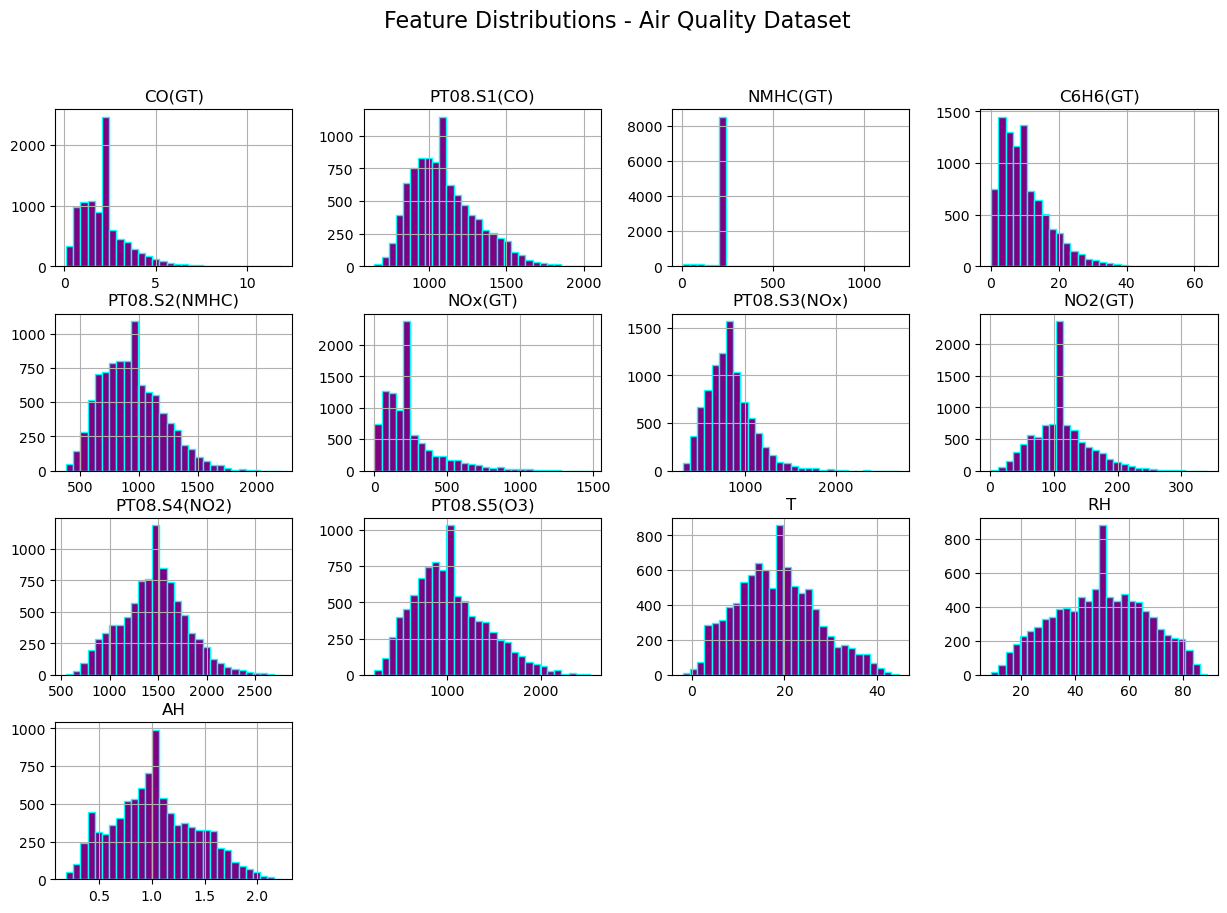

In [ ]:
# PLOT FEATURE DISTRIBUTION USING HISTOGRAM
plt.figure(figsize=(12,8))
air_quality_data.hist(bins=30,figsize=(15,10),color='purple',edgecolor='aqua')
plt.suptitle('Feature Distributions - Air Quality Dataset', fontsize=16)
plt.show()

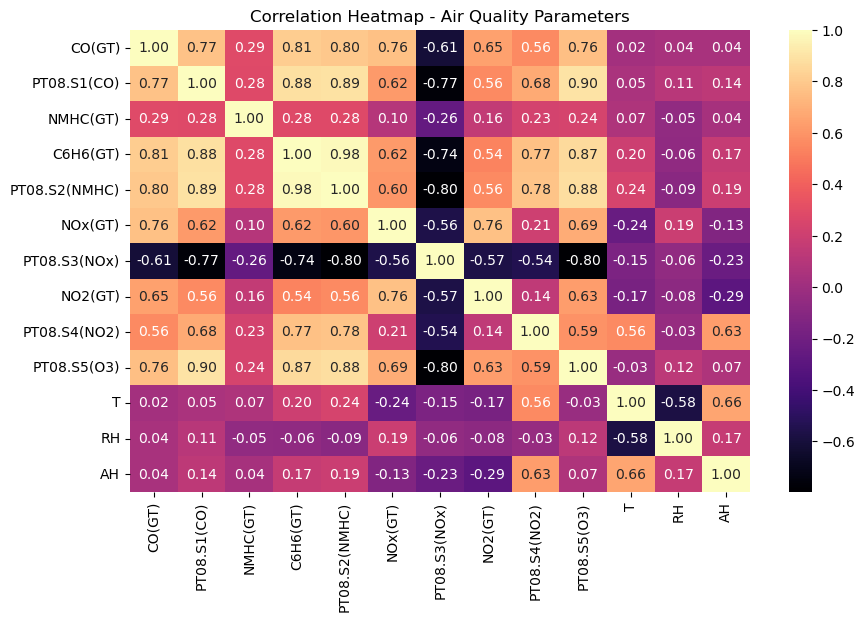

In [ ]:
# CORRETIONAL HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(air_quality_data.corr(numeric_only=True),annot=True,fmt='.2f',cmap='magma')
plt.title('Correlation Heatmap - Air Quality Parameters')
plt.show()

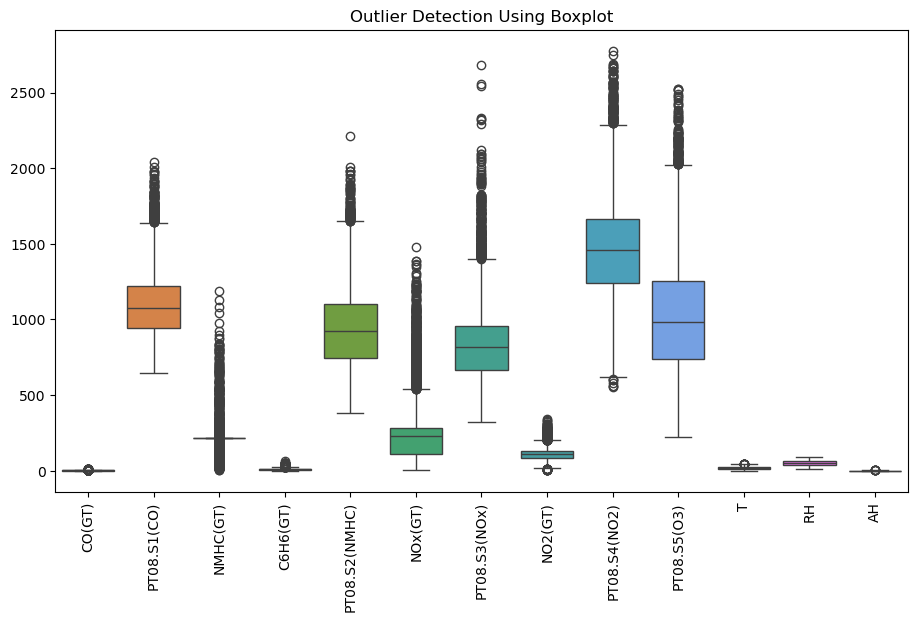

In [ ]:
# BOXPLOT FOR OUTLIER DETECTION
plt.figure(figsize=(11,6))
sns.boxplot(data=air_quality_data,orient='v',palette='husl')
plt.xticks(rotation=90)
plt.title('Outlier Detection Using Boxplot')
plt.show()

**Two Tasks Can Be Perfomed On This Dataset**

*1. Forecasting*

*2. Regression*

**Forecasting With FB Prophet Algorithm**

FB Prophet Documentation : https://facebook.github.io/prophet/docs/quick_start.html

**TIME & DATE PROCESSING**

In [ ]:
# Converting The Data From DD/MM/YYYY to YYYY-MM-DD
air_quality_data['Date']=pd.to_datetime(air_quality_data['Date'],dayfirst=True)
date_info=air_quality_data['Date']
date_info

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]

In [ ]:
print(air_quality_data['Time'])

0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9352    10.00.00
9353    11.00.00
9354    12.00.00
9355    13.00.00
9356    14.00.00
Name: Time, Length: 9357, dtype: object


In [ ]:
air_quality_data['Time']=air_quality_data['Time'].str.replace('.', ':')
time_info=air_quality_data['Time']
air_quality_data['Time']

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object

In [ ]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# Combining 2 Series to a pandas DataFrame
date_time=pd.concat([date_info,time_info],axis=1)
date_time.sample(5)

,Date,Time
6098,2004-11-19,20:00:00
8100,2005-02-11,06:00:00
6125,2004-11-20,23:00:00
1161,2004-04-28,03:00:00
5163,2004-10-11,21:00:00


In [ ]:
date_time.shape

(9357, 2)

In [ ]:
# Combining Date And Time
date_time['ds']=date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [ ]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


*Convert ds from Object Datatype To Date Time Format*

In [ ]:
data=pd.DataFrame()
data['ds']=pd.to_datetime(date_time['ds'])
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [ ]:
data['y']=air_quality_data['RH']
data.head()

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Training The Profit Model
model=Prophet()
model.fit(data)

19:34:50 - cmdstanpy - INFO - Chain [1] start processing
19:34:53 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365,freq='h')
future.tail()

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [ ]:
forecast = model.predict(future)
print("\n<-- Forecast Results -->")
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


<-- Forecast Results -->


,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,33.553257,17.087917,48.651835
9718,2005-04-19 16:00:00,34.036783,18.384160,48.167230
9719,2005-04-19 17:00:00,35.670102,19.437004,52.041503
9720,2005-04-19 18:00:00,38.565725,22.513968,55.129888
9721,2005-04-19 19:00:00,42.119927,26.535839,57.752595


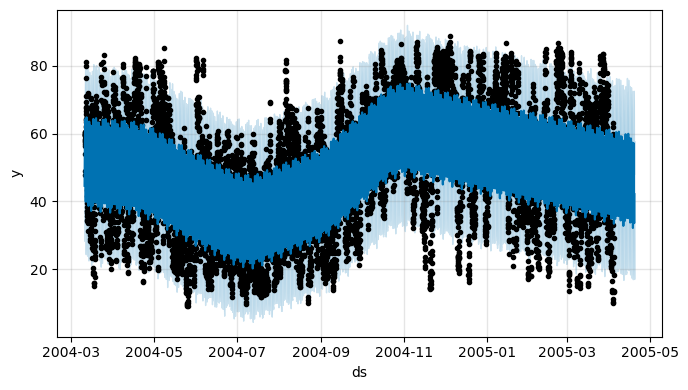

In [ ]:
fig1 = model.plot(forecast,figsize=(7,4))

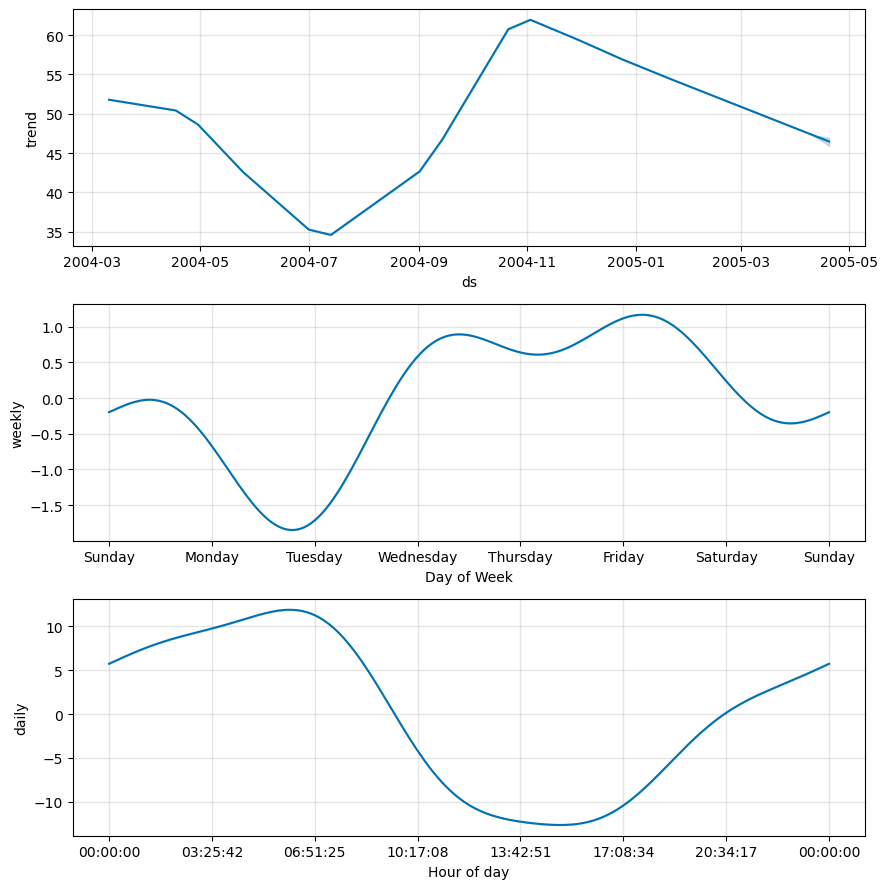

In [ ]:
fig2 = model.plot_components(forecast)

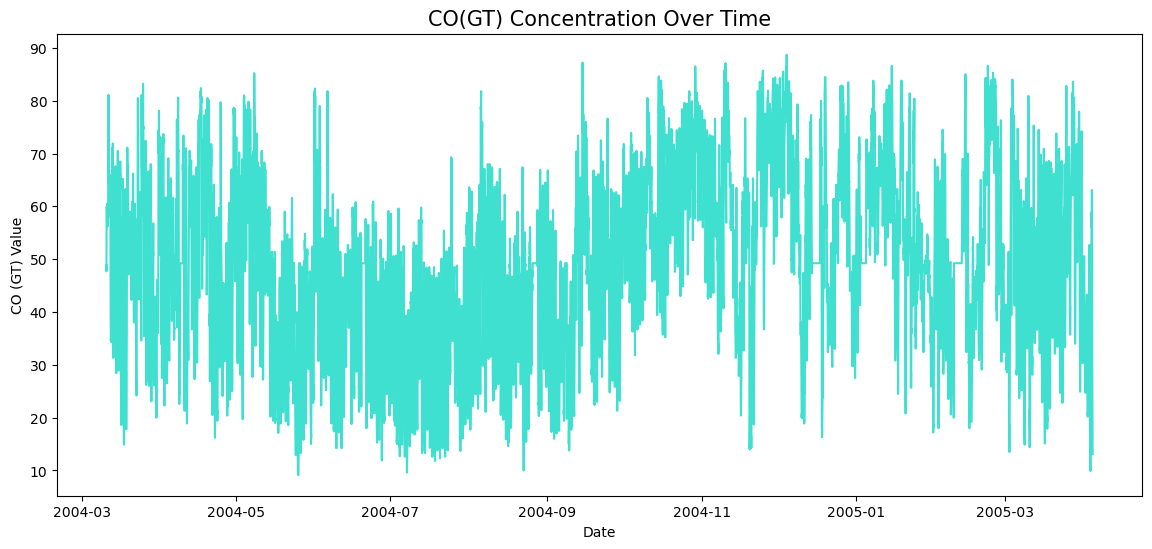

In [ ]:
# TIME SERIES TREND VISUALIZATION
plt.figure(figsize=(14, 6))
plt.plot(data['ds'], data['y'], color='turquoise')
plt.title("CO(GT) Concentration Over Time", fontsize=15)
plt.xlabel("Date")
plt.ylabel("CO (GT) Value")
plt.show()

<Figure size 1000x600 with 0 Axes>

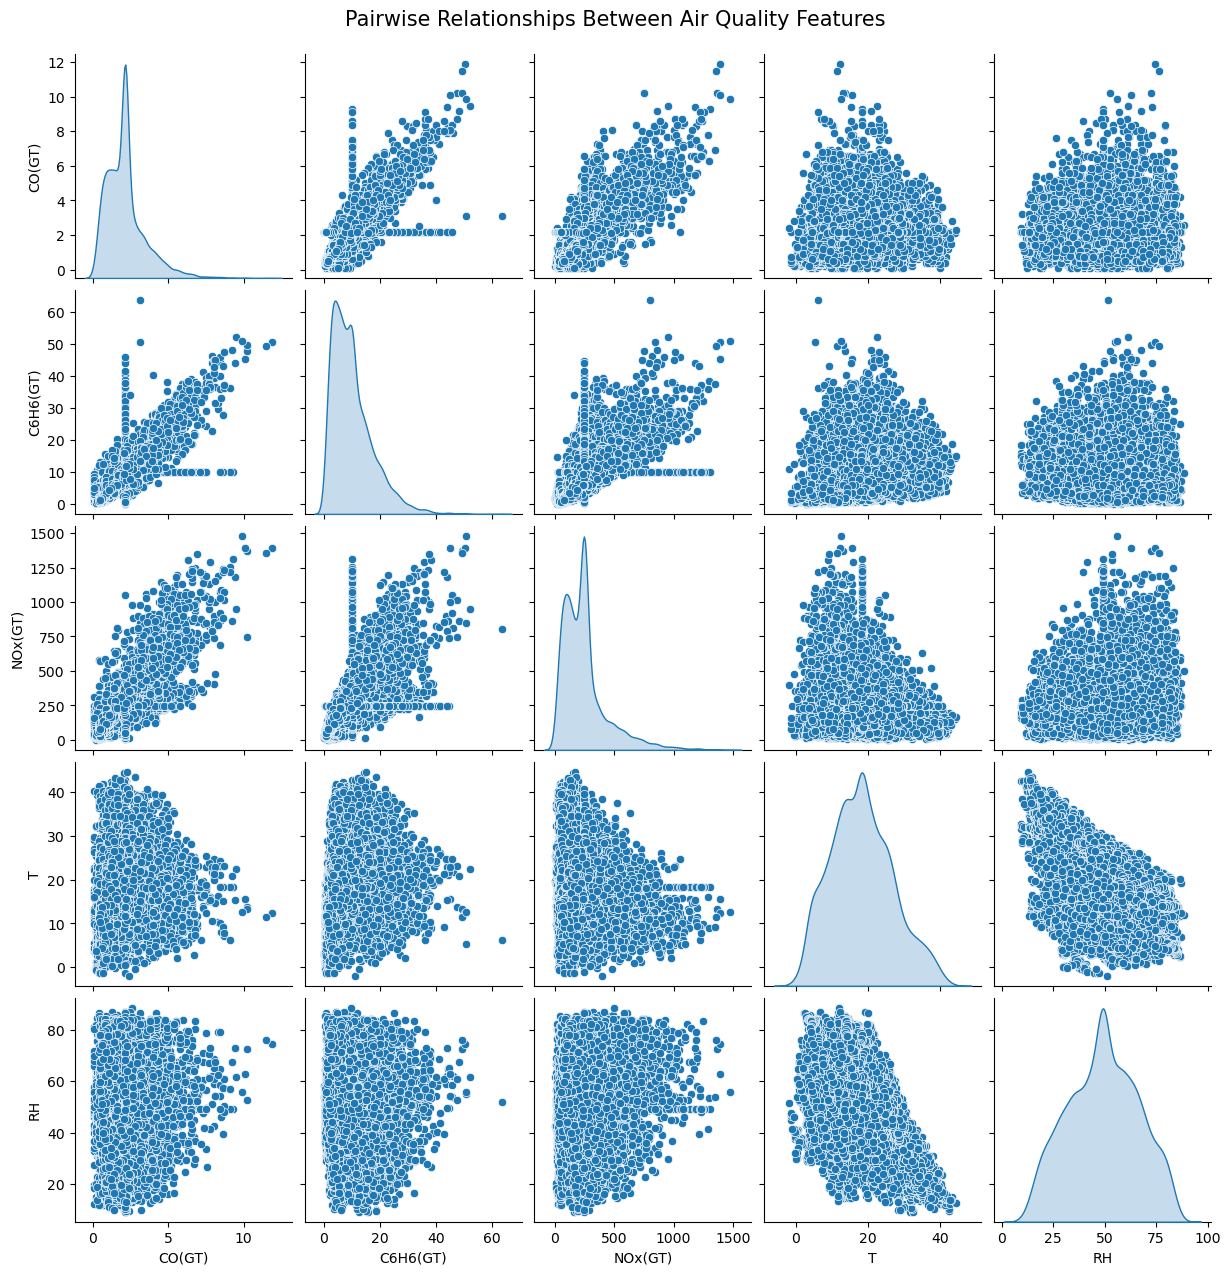

In [ ]:
# PAIRPLOT FOR RELATIONSHIP BETWEEN POLLUTANTS
plt.figure(figsize=(10,6))
sns.pairplot(air_quality_data[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'T', 'RH']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Air Quality Features", y=1.02, fontsize=15)
plt.show()

**Project Completed Successfully — Air Quality Forecasting using ML (Prophet)!**